In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [4]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [12]:
def compute_mse(e: np.ndarray) -> float:
    """Compute the Mean Square Error"""
    return .5 * np.sum(e**2) / len(e)

def compute_mae(e: np.ndarray) -> float:
    """Compute the Mean Absolute Error"""
    return np.sum(np.abs(e)) / len(e)

def compute_loss(y: np.ndarray, tx: np.ndarray, w: np.ndarray, mode: str='mse') -> float:
    """Compute the MSE loss"""
    e = y - tx.dot(w)
    if mode == 'mse':
        loss = compute_mse(e)
    elif mode == 'mae':
        loss = compute_mse(e)
    else:
        raise Exception("Invalid loss mode %s" % mode)
    return loss

In [13]:
print(compute_loss(y, tx, np.array([1., 2.]).T))

2694.4833658870843


# 2 Grid Search

Fill in the function `grid_search()` below:

In [15]:
def grid_search(y: np.ndarray, tx: np.ndarray, w0: np.ndarray, w1: np.ndarray) -> np.ndarray:
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i0 in range(len(w0)):
        for i1 in range(len(w1)):
            w = np.array([w0[i0], w1[i1]])
            loss = compute_loss(y, tx, w)
            losses[i0][i1] = loss
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.503045273182206, w0*=72.93233082706766, w1*=13.15789473684211, execution time=5.207 seconds


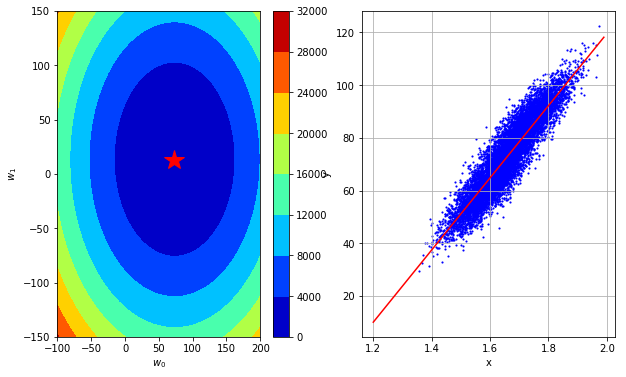

In [16]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=400)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [21]:
def compute_gradient(y: np.ndarray, tx: np.ndarray, w: np.ndarray) -> (float, float):
    """Compute the gradient & the error"""
    e = y - tx.dot(w)
    return - (1 / len(e)) * tx.T.dot(e), e

Please fill in the functions `gradient_descent` below:

In [22]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        gradient, err = compute_gradient(y, tx, w)
        loss = compute_mse(err)
        # update w by gradient
        w = w - gradient * gamma
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [23]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=51.305745401473644, w1=9.435798704492269
Gradient Descent(1/49): loss=265.3024621089598, w0=66.69746902191571, w1=12.266538315840005
Gradient Descent(2/49): loss=37.87837955044126, w0=71.31498610804834, w1=13.115760199244333
Gradient Descent(3/49): loss=17.410212120174467, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450455, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638305, w0=73.29348920882515, w1=13.47963283863509
Gradient Descent(10/49): loss=15.3858879656522, w0=73.29379216412117, w1=13.

In [25]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [31]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    err = y - tx.dot(w)
    gradient = - (1 / len(err)) * tx.T.dot(err)
    return gradient, err


def stochastic_gradient_descent(
    y: np.ndarray,
    tx: np.ndarray,
    initial_w: np.ndarray,
    batch_size: int,
    max_iters: int,
    gamma: int
) -> (list, list):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size, num_batches=batch_size):
            # compute gradient and loss
            gradient, err = compute_gradient(y_batch, tx_batch, w)
            loss = compute_mse(err)
            # update w by gradient
            w = w - gradient * gamma
            # store w and loss
            ws.append(w)
            losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [32]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=45.688240441460884, w1=-14.068262354526734
Gradient Descent(1/49): loss=775.8681725845757, w0=72.87933714432043, w1=-7.0295100313246115
Gradient Descent(2/49): loss=225.78593125735415, w0=51.71509022353109, w1=27.31547940083938
Gradient Descent(3/49): loss=343.9231020994871, w0=65.9260277153305, w1=22.91514084464878
Gradient Descent(4/49): loss=87.04247561627997, w0=71.38734956392084, w1=19.66588794395244
Gradient Descent(5/49): loss=36.337780813700775, w0=74.8781384059796, w1=18.484917591406017
Gradient Descent(6/49): loss=29.166798004893284, w0=76.67312301063612, w1=16.074443078720215
Gradient Descent(7/49): loss=24.46170115361639, w0=80.02880673448585, w1=13.562546454569263
Gradient Descent(8/49): loss=38.068654785456395, w0=75.39820188793686, w1=14.246182836901053
Gradient Descent(9/49): loss=17.893623226290853, w0=70.71160690920996, w1=9.893263879313508
Gradient Descent(10/49): loss=25.15137010958022, w0=68.5692470182035, w1=12.0

In [33]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)